## Q1
Physics of springs is based on Hooke’s Law

\begin{equation*}
  F_{spring} = −ky
\end{equation*}
 
y is the vertical displacement from the equilibrium point. At equilibrium, the gravity force on the mass is equal to the spring force, and the net force is zero. We assume there is no damping force, thus in the problem, we will only consider the net force that is the spring force from vertical displacement from the equilibrium point.

k is the spring constant measured in N/m. Here we assume k is constant. 

Newton’s second law: $F= ma$ where $F=F_{spring}$

\begin{align*}
  ma &= −ky\\
  m\frac{d^2y}{dt^2} &= −ky\\
  \frac{d^2y}{dt^2} +\frac{k}{m}y&=0 
\end{align*}



## Q2

$\frac{d^2y}{dt^2} +\frac{k}{m}y=0$ tells us the acceleration at each poistion.  Given the the formula of acceleration, and the initial position and velocity, we can keep updating the velocity with acceleration, updating position with velocity as follows:
\begin{align*}
   \frac{dy}{dt} &= v\\
  \frac{dv}{dt} &= -\frac{k}{m}y&
\end{align*}

or 

\begin{align*}
   dy &= dtv\\
  dv &= -dt\frac{k}{m}y&
\end{align*}

Forward Euler method uses the derivative at the start of an interval to extrapolate forward.
Thus, we have:
\begin{align*}
  y_{i+1} &= y_i + \Delta t v_i\\
  v_{i+1} &= v_i - \Delta t \frac{k}{m}y_i\\
\end{align*}

## Q3 
Plot Distance vs. Time and calculate value of the spring constant, k

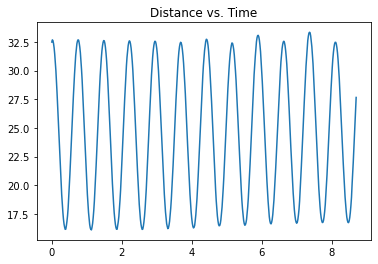

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("position.txt", skiprows=2, delimiter="\t")
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1])
ax.set_title("Distance vs. Time")
plt.show()

The average period from data collected is  0.733s

The mass is 200g

Measured Angular frequency = $\frac{2*\pi}{0.733}$

Angular frequency =$ \sqrt{\frac{k}{m}}$

Therefore, k= $(\frac{2*\pi}{0.733} rad/s)^2*0.2kg = 14.70 kg/s^2$



## Q4 

Plot the data (position vs. time) and interpret 

In [2]:
class SpringMass():
    """
    Spring-Mass Oscillation model

    === Attributes ===
    v: array of velocity
    y: array of position
    k: spring constant measured, implied_k = angular_freq**2*mass
    period: period of oscillation
    mass: mass of weight
    angular_freq: also known as omega, calulated as 2*np.pi/period or sqrt(k/mass)
    t: array of time stamps
    energy_k: kinetic energy
    energy_u: potential energy
    energy_tot: total energy
    gamma: damping coefficient
    """

    def __init__(self, v0, y0, mass, period):
        self.v = [v0]
        self.y = [y0]
        self.mass = mass
        self.period = period
        self.angular_freq = 2 * np.pi / period
        self.k = self.angular_freq ** 2 * mass
        self.t = None

        self.energy_k = [0.5 * self.mass * self.v[-1] ** 2]
        self.energy_u = [0.5 * self.k * self.y[-1] ** 2]
        self.energy_tot = [self.energy_k[-1] + self.energy_u[-1]]

    def integrate(self, dt, t=10, method="forward"):
        """
        update velocity and position based on Forward Euler
        calculate
        :param dt: step size for integration
        :param t: range of time, default is 10 seconds
        :param method: forward or symplectic
        """
        t = np.arange(0, t, dt)
        for i in t[:-1]:  # the last time point is not used because Forward euler uses the starting values
            self.v.append(self.v[-1] - dt * (self.angular_freq ** 2) * self.y[-1])
            if method == "forward":
                self.y.append(self.y[-1] + dt * self.v[-2])
            if method == "symplectic":
                self.y.append(self.y[-1] + dt * self.v[-1])
            self.energy_k.append(0.5 * self.mass * self.v[-1] ** 2)
            self.energy_u.append(0.5 * self.k * self.y[-1] ** 2)
            self.energy_tot.append(self.energy_k[-1] + self.energy_u[-1])

        self.t = t

    def plot(self, y, x):
        """
        plot according to specify x and y, for example
        position vs. time
        velocity vs. time
        velocity vs. position
        :param x: can be any of position, time, velocity, energy, potential energy,kinetic energy
        :param y: can be any of position, time, velocity, energy, potential energy,kinetic energy
        """
        mapping = {"position": self.y, "velocity": self.v, "time": self.t,
                   "energy": self.energy_tot, "kinetic energy": self.energy_k,
                   "potential energy": self.energy_u}

        fig, ax = plt.subplots()
        ax.plot(mapping[x], mapping[y], "red")
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_title(y + " vs " + x)
        plt.show()


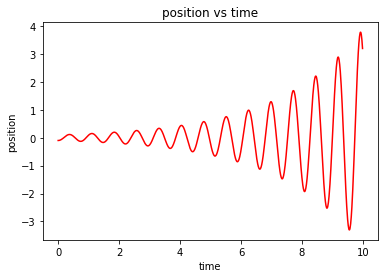

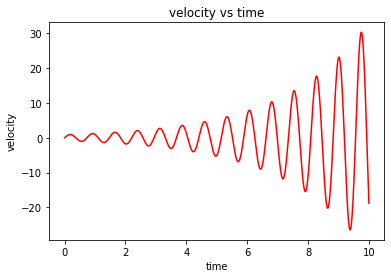

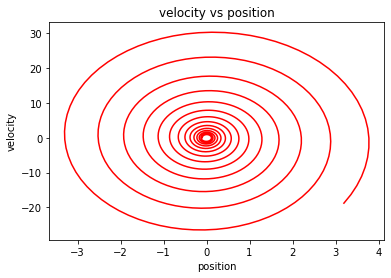

In [3]:
stepsize = 0.01 #[second]
T = 10 #[second]
mass = 0.2 #[kg]
start_velocity = 0
start_position = -0.1 #10cm below equilibrium position
period = 0.733 #[second]

model = SpringMass(start_velocity,start_position, mass, period)
model.integrate(stepsize)
model.plot("position", "time")
model.plot("velocity", "time")
model.plot("velocity", "position")

The plots does not confirm to my expection. I expected Position vs Time and Velocity vs Time plots to have constant amplitidue, but the amplitudes in the plots are increasing. I expected the phase-plot to be ellipse, but it turns out to be increasing ellipse. The plots show that energy increases over time. The Forward Euler gives bad approximation.

## Q5 

What does the energy plot suggest?

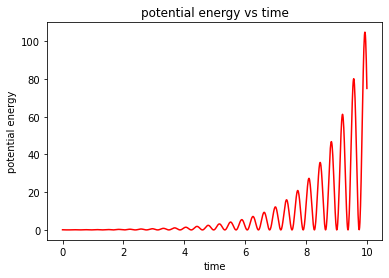

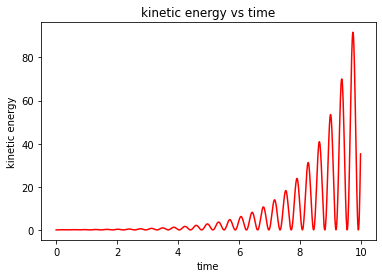

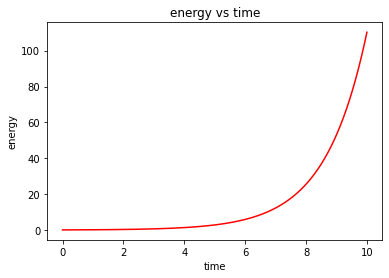

In [4]:
model.plot("potential energy", "time")
model.plot("kinetic energy", "time")
model.plot("energy", "time")

Energy plots suggest energy increases over time. This is in alignment with the velocity vs. time and velocity vs. position plots with increasing amplitudes. 

## Q6

Phase plot should be an ellipse, becaue according to energy conservation:
\begin{equation*}
  \frac{1}{2}mv^2+ \frac{1}{2}ky^2= constant
\end{equation*}
This equation is an ellipse.

## Q7

Forward Euler Method $y(t_{0}+∆t)=y(t_{0})+∆ty'(t_{0})$

Taylor expansion $y(t_{0}+∆t)=y(t_{0})+∆ty'(t_{0})+{\frac {1}{2}}∆t^{2}y''(t_{0})+O(∆t^{3})$

Thus, the error is ${\frac {1}{2}}∆t^{2}y''(t_{0})+O(∆t^{3})$


## Q8

### Plot again with symplectic method

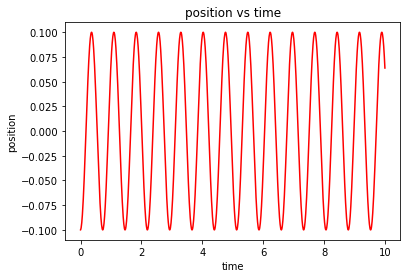

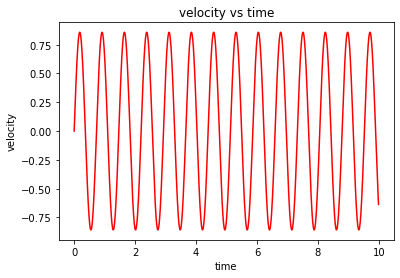

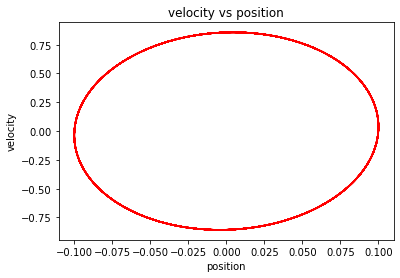

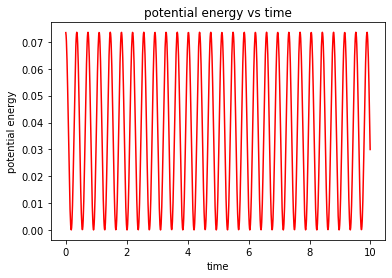

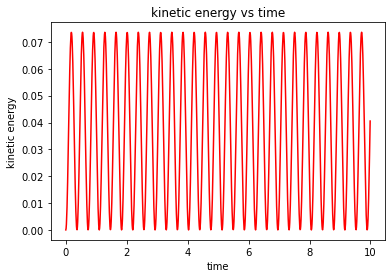

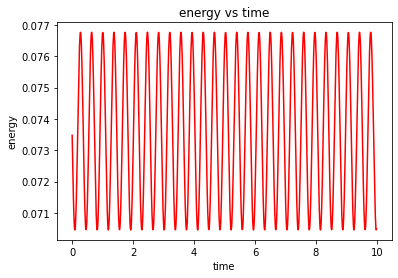

In [5]:
model = SpringMass(start_velocity,start_position, mass, period)
model.integrate(stepsize, method="symplectic")
model.plot("position", "time")
model.plot("velocity", "time")
model.plot("velocity", "position")
model.plot("potential energy", "time")
model.plot("kinetic energy", "time")
model.plot("energy", "time")

These plots are much better, which support energy conservation.

## Q9

### Calculate Reynolds number Re = ρvl/η

where

ρ is the density of the medium (kg/m3),

v is the velocity of the body relative to the medium (m/s),

l is the characteristic length in the direction of flow (m), and

η is the dynamic viscosity (N·s/m2).

### calculate air density

Density of air is calculated by ideal gas law: PV=nRT

Air is 78% Nitrogen(Atomic mass: 28) and 21% Oxygen(Atomic mass: 32) and 1% Argon(Atomic mass: 40). So the weight of one mole of air molecules:

M = (0.78)(28g)+(0.21)(32g)+(0.01)(40g) = 29 g

Assume P =100,000 pascal, T = 298 K, R =8.31 J/mol*K

The volume of one mole of air molecules:

V = (8.31)(300)/100,000 = 0.02493 m^3

density = M/V = 0.029/0.02493 = 1.16 kg/m^3

### othe parameters

Under standard atmospheric conditions (25 °C and pressure of 1 bar), the dynamic viscosity of air is 18.5 μPa·s. Velocity is between 0-0.9 m/s, we will use the maximum value for calculation. Characteristic length is the diameter of the disk 12cm. 

### calcucate Reynolds number 

Re = ρvl/η = (1.16)(0.9)(0.12)/(18.5*10^-6) = 6772

This Reynolds number is greater than 4000, which means drag force is dependent on the square of the velocity. However, there are so many parameters that are estimated with considerable errors, so it might be possible that the true Reynolds number is still below 4000, which would make drag force directly proportional to velocity.

## Q10

### Solve differential equation to find $\gamma$

For underdamping case, the quasi-frequency=$\frac{(4km-\gamma^2)^{1/2}}{2m}$

Here's sample of quasi-period from data

\begin{matrix}
start\>time & end\>time & period\\
0.117 & 0.883 & 0.766\\
24.617 & 25.383 & 0.766\\
26.917 & 27.667 & 0.75\\
54.450 & 55.217 & 0.767
\end{matrix}

The average period from sample data is 0.7623. The average quasi-frequency from data is 8.2

The total mass is 216.7g, including Disk mass 16.7g and Weight 200g.

Spring constant k = 14.70 kg/s^2 obtained from previous experiment.

Plugging all data into quasi-frequency=$\frac{(4km-\gamma^2)^{1/2}}{2m}$, solve for $\gamma=0.3345$. 

Note that this calculation is unstable. A small change in average quasi-frequency from data will result in a big change in the final result.

## Q11

### Make position vs. time plot. 

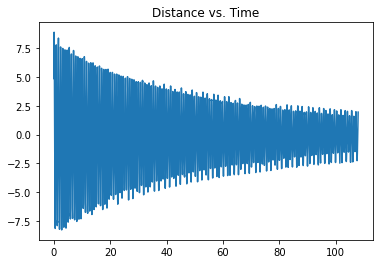

In [6]:
data = np.loadtxt("position_damped.txt", skiprows=2, delimiter="\t")
fig, ax = plt.subplots()

amplitude = np.array(data[:,1]) - 26 # the equilibrium distance is 26cm
ax.plot(data[:,0], amplitude)
ax.set_title("Distance vs. Time")
plt.show()


The plot shows exponential decay of the oscillation envelope. This means energy is dissipating.

### Use the plot to find $\gamma$

The calibrated distance(equilibrium distance) is 26cm. Amplitudes are calculated by subtracting the locally largest distances by 26cm.

The following are the 5 readings of amplitudes and their corresponding gamma calculated in the way specified in session 2.2 of the assignment. 

\begin{matrix}
start\>time & Distance & Amplitude & Target\>amplitude & Target\>Distance & end\>time & total\>time & gamma\\
0.117 & 34.889 & 8.889 & 3.27 & 29.27 & 46.783 & 46.667 & 0.043\\
0.883 & 33.790 & 7.79 & 2.866 & 28.866 & 63.600 & 62.717 & 0.032\\
1.650 & 34.380 & 8.38 & 3.083 & 29.083 & 60.583 & 58.933 & 0.034\\
2.417 & 33.612 & 7.612 & 2.800 & 28.8 & 59.800 & 57.383 & 0.035\\
3.183 & 33.482 & 7.482 & 2.752 & 28.752 & 63.617 & 60.434 & 0.033\\
\end{matrix}

Average gamma is 0.035.


## Q12

I have made the changes to the SpringMass class to take on gamma(dammping coefficient). 

In [7]:
class SpringMass_damped():
    """
    Spring-Mass Oscillation model

    === Attributes ===
    v: array of velocity
    y: array of position
    k: spring constant measured, implied_k = angular_freq**2*mass
    period: period of oscillation
    mass: mass of weight
    angular_freq: also known as omega, calulated as 2*np.pi/period or sqrt(k/mass)
    t: array of time stamps
    energy_k: kinetic energy
    energy_u: potential energy
    energy_tot: total energy
    gamma: damping coefficient
    """

    def __init__(self, v0, y0, mass, k, gamma=0):
        self.v = [v0]
        self.y = [y0]
        self.mass = mass
        self.period = period
        self.omega = np.sqrt(k/mass)
        self.k = k
        self.t = None

        self.energy_k = [0.5 * self.mass * self.v[-1] ** 2]
        self.energy_u = [0.5 * self.k * self.y[-1] ** 2]
        self.energy_tot = [self.energy_k[-1] + self.energy_u[-1]]
        self.gamma = gamma

    def integrate(self, dt, t=10, method="forward"):
        """
        update velocity and position based on Forward Euler
        calculate
        :param dt: step size for integration
        :param t: range of time, default is 10 seconds
        :param method: forward or symplectic
        """
        t = np.arange(0, t, dt)
        for i in t[:-1]:  # the last time point is not used because Forward euler uses the starting values
            self.v.append(self.v[-1] - dt * (self.omega ** 2) * self.y[-1] - self.gamma*self.v[-1])
            if method == "forward":
                self.y.append(self.y[-1] + dt * self.v[-2])
            if method == "symplectic":
                self.y.append(self.y[-1] + dt * self.v[-1])
            self.energy_k.append(0.5 * self.mass * self.v[-1] ** 2)
            self.energy_u.append(0.5 * self.k * self.y[-1] ** 2)
            self.energy_tot.append(self.energy_k[-1] + self.energy_u[-1])

        self.t = t

    def plot(self, y, x):
        """
        plot according to specify x and y, for example
        position vs. time
        velocity vs. time
        velocity vs. position
        :param x: can be any of position, time, velocity, energy, potential energy,kinetic energy
        :param y: can be any of position, time, velocity, energy, potential energy,kinetic energy
        """
        mapping = {"position": self.y, "velocity": self.v, "time": self.t,
                   "energy": self.energy_tot, "kinetic energy": self.energy_k,
                   "potential energy": self.energy_u}

        fig, ax = plt.subplots()
        ax.plot(mapping[x], mapping[y], "red")
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_title(y + " vs " + x)
        plt.show()

Now we will initialize the model with values obtained from experiment and make plots

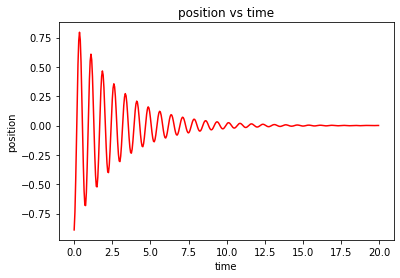

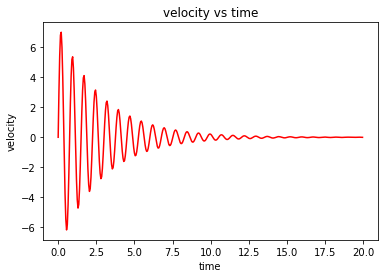

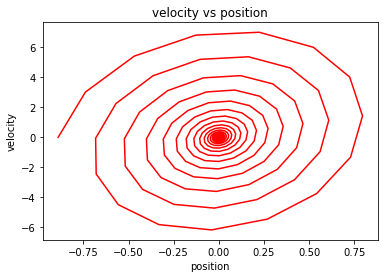

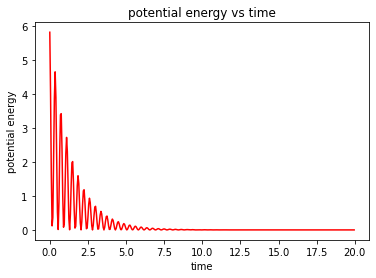

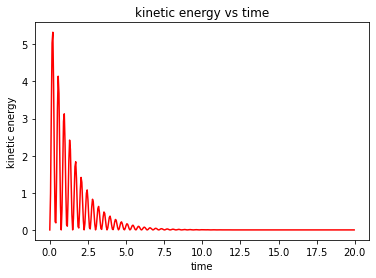

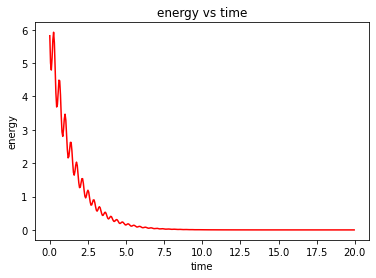

In [8]:
stepsize = 0.05  # [second]
T = 20  # [second]
mass = 0.2167  # [kg]
start_velocity = 0
start_position = -0.89  # 10cm below equilibrium position
k = 14.7 # [kg/s^2]
gamma = 0.035   # from question 11

model = SpringMass_damped(start_velocity, start_position, mass, k, gamma)
model.integrate(stepsize, t=T, method="symplectic")
model.plot("position", "time")
model.plot("velocity", "time")
model.plot("velocity", "position")

model.plot("potential energy", "time")
model.plot("kinetic energy", "time")
model.plot("energy", "time")

The above graphs are drawn with stepsize = 0.05, the amplitude is down to zero in 20 seconds. I have tried different stepsize, and it appears that with smaller stepsize, the decay is faster. 

Therefore, it is a tradeoff in choosing the stepsize. If stepsize is too big, the entire approximation is inaccurate. If stepsize is too small, the decay is exaggerated, thus the approximation is also inaccurate.

In conclusion, the model is poor in matching with experimental data. There are a few possible reasons. 
- the mathematical model could be wrong. 
- I might have made an error in the coding. 
- the numerical method just won't do the job
- gamma(damping coefficient) is too big, i.e., measurement error